# Introduction
Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

%matplotlib inline

In [3]:
df = pd.read_csv('ESSdata_Thinkful.csv')
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [22]:
df.isna().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [24]:
df.dropna(inplace=True)
df.isna().sum()

cntry      0
idno       0
year       0
tvtot      0
ppltrst    0
pplfair    0
pplhlp     0
happy      0
sclmeet    0
sclact     0
gndr       0
agea       0
partner    0
dtype: int64

### 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
According to the plots below, most of the countries had the same trust levels from 2012 to 2014. The only countries that had visual changes were in the Czech Republic and Germany. The t-test belows shows that there were significant changes to the trust level from 2012 to 2014 for each country. Surprisingly, the countries that had significant trust changes were Spain and Sweden. After careful look at subtle changes in the charts, it looks like Sweden trusts more people and Spain has more people distrusting others. 

Violinplots were chosen to see the distribution of country and trust by year. As most of the distributions were normal or binomial, a parametric test was chosen to see if there were any years that were not similar per country. The p-values > .05 meant that a countries trust had significantly changed by year.

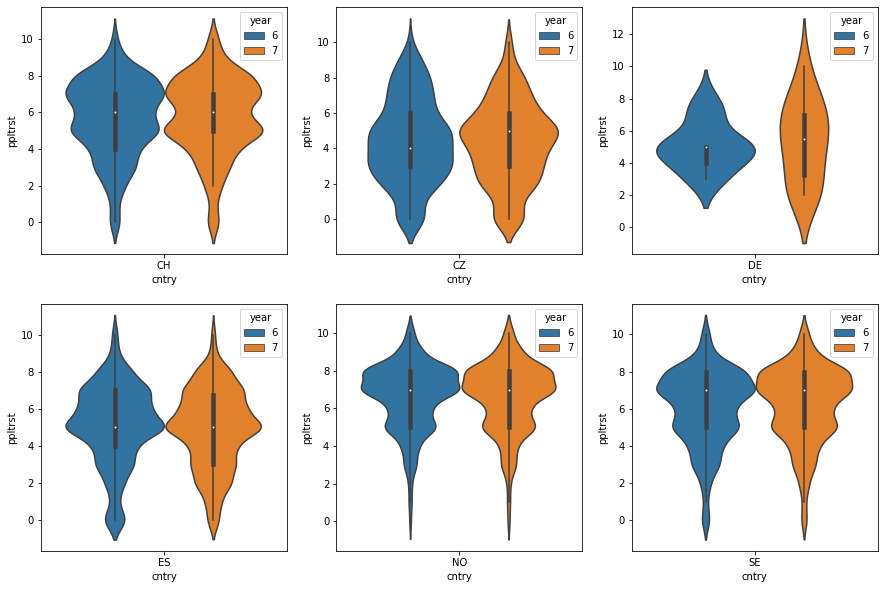

In [25]:
country = df['cntry'].unique()

plt.figure(figsize=(15, 10))
for i, x in enumerate(country):
    tmp = df[df['cntry']==x]
    
    plt.subplot(2, 3, i+1)
    sns.violinplot(x=tmp['cntry'], y=tmp['ppltrst'], hue=tmp['year'])

In [26]:
for x in country:
    tmp = df[df['cntry']==x]
    df12 = tmp[tmp['year']==6]
    df14 = tmp[tmp['year']==7]

    print(x,)
    print(stats.ttest_ind(df12['ppltrst'], df14['ppltrst']), '\n')

CH
Ttest_indResult(statistic=-0.7156974792217816, pvalue=0.4742916002909491) 

CZ
Ttest_indResult(statistic=0.34075433231518504, pvalue=0.7333479315909976) 

DE
Ttest_indResult(statistic=-0.3466213170125284, pvalue=0.7317764273785732) 

ES
Ttest_indResult(statistic=2.1000674443244907, pvalue=0.03583204193521363) 

NO
Ttest_indResult(statistic=0.5119224181145228, pvalue=0.6087850218131977) 

SE
Ttest_indResult(statistic=-2.0268698056063146, pvalue=0.0428293634522298) 



### 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
The violin plots below show that most people remained the same in terms of hapiness from 2012 to 2014. A parametric test was used to see if there were any statistically major changes which identified no changes. A kruskal and Wallace test was then applied and it was discovered that the only country with significant changes was Spain. Judging by the chart it looks like there were more content people in Spain.

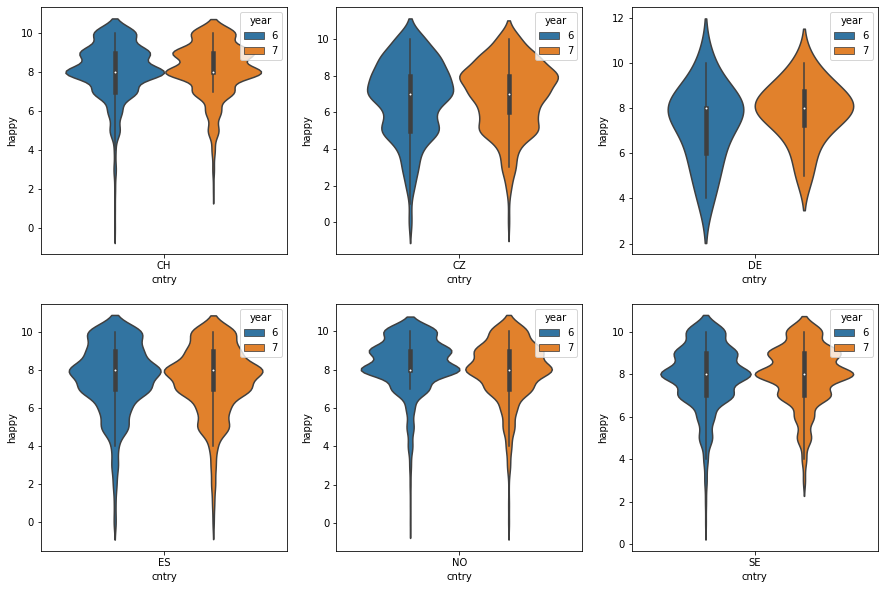

In [27]:
country = df['cntry'].unique()

plt.figure(figsize=(15, 10))
for i, x in enumerate(country):
    tmp = df[df['cntry']==x]
    
    plt.subplot(2, 3, i+1)
    sns.violinplot(x=tmp['cntry'], y=tmp['happy'], hue=tmp['year'])

In [29]:
for x in country:
    tmp = df[df['cntry']==x]
    df12 = tmp[tmp['year']==6]
    df14 = tmp[tmp['year']==7]

    print(x)
    print(stats.ttest_ind(df12['happy'], df14['happy']), '\n')

CH
Ttest_indResult(statistic=-0.812142488327401, pvalue=0.4168411011770018) 

CZ
Ttest_indResult(statistic=-1.1592536826704618, pvalue=0.24658245820500238) 

DE
Ttest_indResult(statistic=-0.966317541228559, pvalue=0.3431409128727073) 

ES
Ttest_indResult(statistic=1.3750588408504656, pvalue=0.16924771370417369) 

NO
Ttest_indResult(statistic=4.152957205997266, pvalue=3.4778681704487346e-05) 

SE
Ttest_indResult(statistic=-0.5372790210326394, pvalue=0.5911442306272388) 



In [35]:
# Kruskal-Wallace Test
for x in country:
    tmp = df[df['cntry']==x]
    df12 = tmp[tmp['year']==6]
    df14 = tmp[tmp['year']==7]

    # Print the test statistic followed by the probability of getting this result
    # if the groups were not different.
    print(x)
    print(stats.kruskal(
        df12['happy'],
        df14['happy']), '\n')

CH
KruskalResult(statistic=0.7393607796289999, pvalue=0.3898657201494511) 

CZ
KruskalResult(statistic=0.7888702806828175, pvalue=0.37444194652901) 

DE
KruskalResult(statistic=0.7954545454545382, pvalue=0.3724558699813717) 

ES
KruskalResult(statistic=2.9615793608595036, pvalue=0.08526461865591295) 

NO
KruskalResult(statistic=17.78863118177249, pvalue=2.4685385809958533e-05) 

SE
KruskalResult(statistic=0.10011450993142058, pvalue=0.7516922609168144) 



### 3. Who reported watching more TV in 2012, men or women?
A pair of histograms were used to visually see the key differences between the viewing habits of males and females. For the most part both genders followed the same trend. This was confirmed by calculating the mean for both genders. Furthermore, a parametric test confirmed that there were no significant differences. 

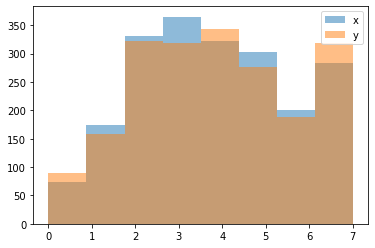

In [48]:
tmp = df[df['year']==6]

df_male = tmp[tmp['gndr']==1]
df_female = tmp[tmp['gndr']==2]

bins = 8

plt.hist(df_male['tvtot'], bins, alpha=0.5, label='x')
plt.hist(df_female['tvtot'], bins, alpha=0.5, label='y')

plt.legend(loc='upper right')
plt.show()

In [50]:
f_avg = df_female['tvtot'].mean()
m_avg = df_male['tvtot'].mean()

print('Female Avg TV Watch Time: {}'.format(f_avg))
print('Male Avg TV Watch Time: {}'.format(m_avg))
print(stats.ttest_ind(df_female['tvtot'], df_male['tvtot']), '\n')

Female Avg TV Watch Time: 3.9053518334985133
Male Avg TV Watch Time: 3.8592303945445687
Ttest_indResult(statistic=0.7323552192640558, pvalue=0.4639939646110154) 



### 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
A violinplot was used to illustrate the dataset. The plots were nearly identical so the statistics of the data was calculated. A parametric test was applied due to both variables being binomial. Surprisingly there was a significant difference between the people that are married and the ones that are alone. A person who is married is more likely to believe that people were fair in 2012.

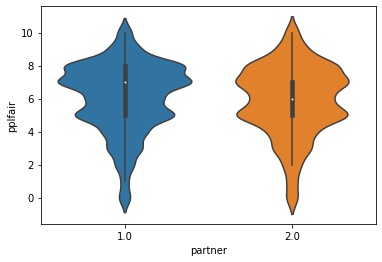

In [52]:
sns.violinplot(x=tmp['partner'], y=tmp['pplfair'])

plt.show()

In [56]:
forever_alone = tmp[tmp['partner']==2]
constantly_in_trouble_with_wife = tmp[tmp['partner']==1]

print(stats.ttest_ind(forever_alone['pplfair'], 
                      constantly_in_trouble_with_wife['pplfair']), '\n')

print('Forever Alone Avg Fairness: {}'.format(forever_alone['pplfair'].mean()))
print('Constantly in Trouble Avg Fairness: {}'.format(constantly_in_trouble_with_wife['pplfair'].mean()))

Ttest_indResult(statistic=-3.0430439318464235, pvalue=0.002356936676939248) 

Forever Alone Avg Fairness: 5.86592544146501
Constantly in Trouble Avg Fairness: 6.0743509047993705


### 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

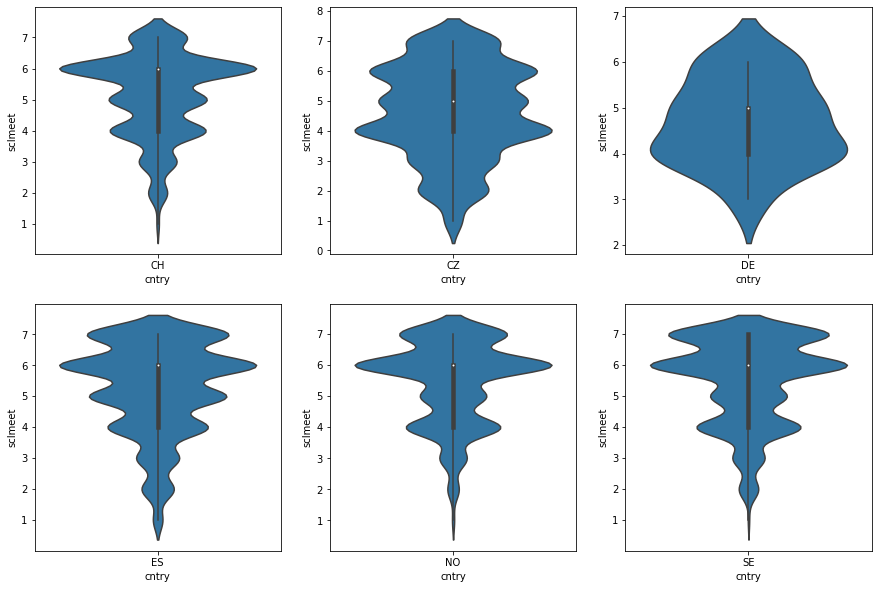

In [62]:
df14 = df[df['year']==7]

country = df14['cntry'].unique()


plt.figure(figsize=(15, 10))
for i, x in enumerate(country):
    tmp = df[df['cntry']==x]
    
    plt.subplot(2, 3, i+1)
    sns.violinplot(x=tmp['cntry'], y=tmp['sclmeet'])

### 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

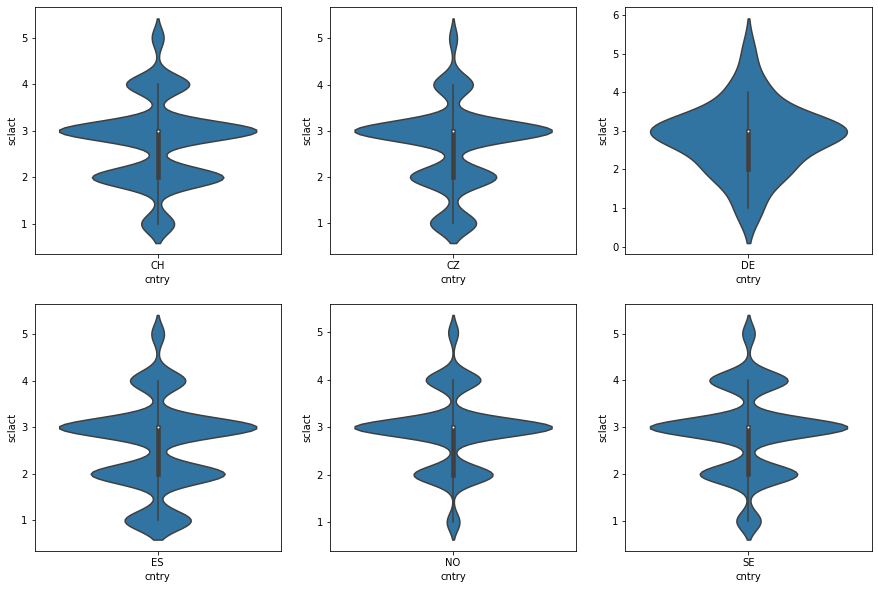

In [63]:
df14 = df[df['year']==7]

country = df14['cntry'].unique()


plt.figure(figsize=(15, 10))
for i, x in enumerate(country):
    tmp = df[df['cntry']==x]
    
    plt.subplot(2, 3, i+1)
    sns.violinplot(x=tmp['cntry'], y=tmp['sclact'])